<a id = 'top'></a>

# Contents

- [Tetractys](#tetractys)
- [The Dichotomy](#dichotomy)
- [The Race](#race)
- [The Arrow](#arrow)

In [1]:
import pandas
import matplotlib.pyplot as plt
import numpy as np
import networkx as nx
import math

<a id = 'tetractys'></a>

[(Back to top)](#top)

# The Tetractys

In [ ]:
# Create an empty graph object with no nodes and edges.
G = nx.Graph()

# Add a few nodes to the network above using different data types
G.add_node(1)
G.add_node('one')
G.add_node(3)
G.add_node('second')


G.add_node(math.cos)

# View network nodes
G.nodes()

# Add nodes from list
list_of_nodes = [2, 3, 'node4']
G.add_nodes_from(list_of_nodes)
G.nodes()

H = nx.path_graph(7)
print(H.nodes())

# Add nodes from a path graph
G.add_nodes_from(H)
print(G.nodes())

# Add edges to graph nodes
G.add_edge(0, 'second')
G.add_edge(2, 3)
G.add_edge('second', 'node4')
G.add_edge(0, 'node4')

# Add edges from a list
list_of_edges = [(2, 3), (4, 5), ('node4', 2)]
G.add_edges_from(list_of_edges)

# View edges
print(G.edges())

# Inspect number of nodes 
print(G.number_of_nodes(), len(G), len(G.nodes()))

# Inspect number of edges
print(G.number_of_edges(), len(G.edges()))

# Visualize the network
nx.draw(G)

# Visualize the network with labels 
nx.draw(G, with_labels = True )

# Remove node from a network 
print(G.nodes())
G.remove_node(0)
print(G.nodes())

# Remove edge from a network 
print(G.edges())
G.remove_edge('second', 'node4')
print(G.edges())

# Clear a network 
G.clear()
print(G.nodes(), G.edges())

G.node[0]['name'] = 'pizza'
G.node[1]['name'] = 'mac and cheese'
G.node[2]['name'] = 'balogna sandwich'
G.node[3]['name'] = 'pizza'
nx.get_node_attributes(G,'name')
nx.draw(G,labels=nx.get_node_attributes(G,'name'),node_size=5000)

# Add attributes to graph from a list 
prices = [3,5,2,7,5,6,2,4,9,12]
for i in range(10):
    G.node[i]['price'] = prices[i]
print(G.nodes('name'))
print(G.nodes('price'))

# Add edge Attributes
G.add_edge(1, 5, weight=4.7)
G[1][2]['weight'] = 5.6

print(G[1][5]['weight'])
print(G[1][2]['weight'])

# Add edge from method

G.add_edges_from([(3, 4), (4, 5)], color='red')
G.add_edges_from([(1, 2, {'color': 'blue'}), (2, 3, {'weight': 8})])
print(G[2][3]['weight'])
print(G[3][4]['color'])
print(G[4][5]['color'])
print(G[1][2]['color'])
print(G[1][2]) # All edge attributes

In [ ]:
1 ** 2 + side ** 2 = 2 **2
1 + side ** 2 = 4
side ** 2 = 3


In [67]:
def tetractys_edges(limit):
    #Numbers 1 through 10
    numbers = list(np.arange(1, limit + 1))
    #Put numbers into rows: 1; 2, 3; 4, 5, 6; 7, 8, 9, 10
    rows = []
    count = 1
    while numbers:
        rows.append([numbers.pop(0) for n_times in range(count)])
        count += 1
    #Create edges between the numbers in each row
    edges = [(num, row[i + 1]) for row in rows[1:] for i, num in enumerate(row[:-1])]
    #Create first edge between each number and the number in the row below it
    edges.extend([(num, rows[i + 1][j]) for i, row in enumerate(rows[:-1]) for j, num in enumerate(row)])
    #Create second edge between each number adn the number in the row below it
    edges.extend([(num, rows[i + 1][j + 1]) for i, row in enumerate(rows[:-1]) for j, num in enumerate(row)])
    
    #Now create dictionary of positions for nodes
    x = 0
    y = 0
    v = np.sqrt(3) # To draw equilateral triangles with sides of length 2
    pos = {}
    for i in range(1, len(rows) + 1):
        for num in rows[-i]:
            pos[num] = (x, y)
            x += 2
        x = i #Reset x
        y += v
    
    return edges, pos

/Users/ssrosa/anaconda3/envs/learn-env/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


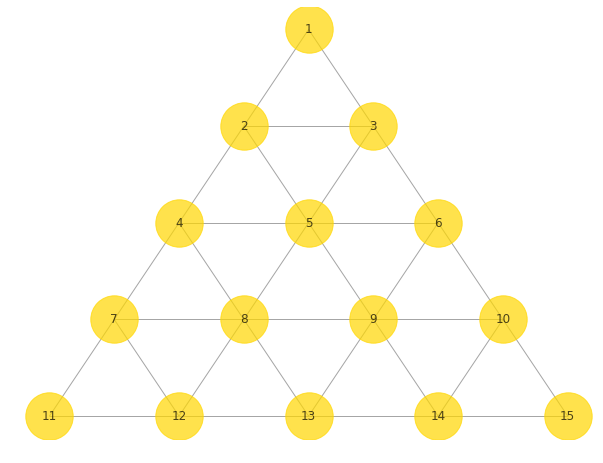

In [70]:
fig = plt.figure(figsize = (8, 6))
#The final number for the drawing. (Standard is 10.)
limit = 15
#Create a list of edges as tuples for the range(limit + 1)
edges, pos = tetractys_edges(limit)

# Create an empty graph object with no nodes and edges.
G = nx.Graph()

G.add_nodes_from(np.arange(1, limit + 1))
G.add_edges_from(edges)

#nx.get_node_attributes(G,'name')
#nx.draw(G,labels=nx.get_node_attributes(G,'name'),node_size=5000)
nx.draw(G, with_labels = True, node_size = 2250, node_color = 'gold', alpha = 0.7, edge_color = 'gray', pos = pos)

In [66]:
pos

{1: (3, 5.196152422706632),
 2: (2, 3.4641016151377544),
 3: (4, 3.4641016151377544),
 4: (1, 1.7320508075688772),
 5: (3, 1.7320508075688772),
 6: (5, 1.7320508075688772),
 7: (0, 0.0),
 8: (2, 0.0),
 9: (4, 0.0),
 10: (6, 0.0)}

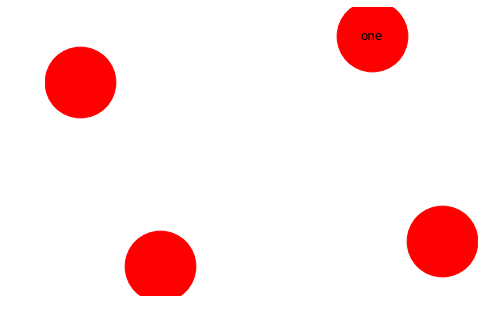

In [41]:
#nx.get_node_attributes(G,'name')
#nx.draw(G,labels=nx.get_node_attributes(G,'name'),node_size=5000)

G = nx.Graph()
G.add_nodes_from(one)
G.node[1]['number'] = 'one'
#for node in one:
#    G.node[node]['number'] = 'one' for node in one
#G.add_nodes_from(two)
#for node in two:
#    G.node[node]['number'] = 'one'
G.add_nodes_from(three)
G.add_nodes_from(four)
#G.add_edges_from(two_edges, three_edges, four_edges)
names = nx.get_node_attributes(G, 'name')
numbers = nx.get_node_attributes(G, 'number')
nx.draw(G, labels = numbers, node_size = 5000)

In [28]:
[G.node[this_node]['number'] = 'one' for this_node in one]

SyntaxError: invalid syntax (<ipython-input-28-88079f1775b4>, line 1)

In [40]:
names = nx.get_node_attributes(G, 'name')
names

{}

In [30]:
G.node[1]['number'] = 'one'

In [31]:
for this_node in one:
    G.node[this_node]['number'] = 'one'

In [38]:
test = nx.get_node_attributes(G,'name')
print(test)

{}


In [37]:
G.node[1]

{}

<a id = 'dichotomy'></a>

[(Back to top)](#top)

# The Dichotomy

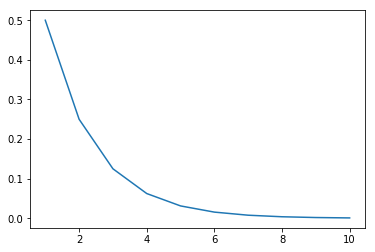

In [2]:

#1/256, 1/128, 1/64, 1/32, 1/16, 1/8, 1/2, 1
x = np.arange(1, 11)
y = 1 * ((1 / 2)**x)
plt.plot(x, y)

In [53]:
print(x)
print(y)

[ 1  2  3  4  5  6  7  8  9 10]
[0.5        0.25       0.125      0.0625     0.03125    0.015625
 0.0078125  0.00390625 0.00195312 0.00097656]


In [56]:
1 * ((1 / 2) ** 100) == 0

False

In [57]:
1 * ((1 / 2) ** 1000) == 0

False

In [36]:
#5 × 10^-324
1 * ((1 / 2) ** 1074)

5e-324

In [60]:
#Exceeds the maximum precision of the program
1 * ((1 / 2) ** 10000) == 0

True

<a id = 'race'></a>

[(Back to top)](#top)

# The Race

In [71]:
time_steps = np.arange(0, 11)
tortoise_dist = [0]
tortoise_speed = 1
achilles_dist = [0]
achilles_speed = 2
#Head start
tortoise_dist[-1] += 5

#Begin the race
for step in time_steps[1:]:
    tortoise_dist.append(tortoise_dist[0] + (tortoise_speed * step))
    achilles_dist.append(achilles_dist[0] + (achilles_speed * step))

In [64]:
tortoise_dist, achilles_dist

([5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10])

In [65]:
time_steps

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

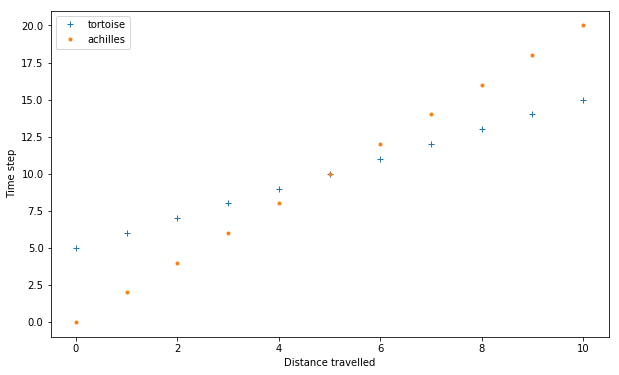

In [72]:
fig = plt.figure(figsize = (10,6))
plt.plot(time_steps, tortoise_dist,  '+', label = 'tortoise')
plt.plot(time_steps, achilles_dist, '.', label = 'achilles')
plt.ylabel('Time step')
plt.xlabel('Distance travelled')
plt.legend()

<a id = 'arrow'></a>

[(Back to top)](#top)

# The Arrow